In [1]:
import sys

sys.path.append('../codes')

In [2]:
from star import Star

In [3]:
name = 'V1298 Tau'
# t = Target(name)
s = Star(name)

Target: V1298 Tau


/home/jp/miniconda3/envs/isochrones/lib/python3.6/site-packages/astroquery/vizier/core.py:769: UserWarning: VOTABLE parsing raised exception: None:9812:264: ValueError: invalid literal for int() with base 10: 'null' (in row 0, col 'Cl')
  warnings.warn("VOTABLE parsing raised exception: {0}".format(ex))


In [4]:
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive
import pandas as pd

redownload = False

fp = '../data/nexsci_data.csv'
if redownload:
    #pstable combines data from the Confirmed Planets and Extended Planet Parameters tables
    tab = NasaExoplanetArchive.query_criteria(table="pscomppars", 
                                              where="discoverymethod like 'Transit'"
                                            )
    df = tab.to_pandas()
    df.to_csv(fp, index=True)
else:
    df = pd.read_csv(fp, index_col=0)
    df.index.name = 'index'
df.head()

,pl_name,pl_letter,hostname,hd_name,hip_name,tic_id,disc_pubdate,disc_year,discoverymethod,disc_locale,...,sy_pmra,sy_pmraerr1,sy_pmraerr2,sy_pmrastr,x,y,z,htm20,sky_coord.ra,sky_coord.dec
index,,,,,,,,,,,,,,,,,,,,,
0,Kepler-276 c,c,Kepler-276,NaN,NaN,TIC 138213510,2014-02,2013,Transit,Space,...,7.99553,0.051580,-0.051580,7.9955300&plusmn;0.0515805,0.310575,-0.711954,0.629813,1302657699,293.568197,39.036312
1,Kepler-829 b,b,Kepler-829,NaN,NaN,TIC 123451768,2016-05,2016,Transit,Space,...,7.93777,0.040833,-0.040833,7.9377700&plusmn;0.0408326,0.157566,-0.720680,0.675124,-792260935,282.332831,42.463813
2,K2-283 b,b,K2-283,NaN,NaN,TIC 266017624,2018-12,2018,Transit,Space,...,-10.97340,0.053624,-0.053624,-10.9734000&plusmn;0.0536244,0.959702,0.224997,0.168368,609813555,13.194368,9.692918
3,Kepler-477 b,b,Kepler-477,NaN,NaN,TIC 158633329,2016-05,2016,Transit,Space,...,-26.00000,NaN,NaN,-26.0,0.229185,-0.702544,0.673726,-1968935374,288.067445,42.355305
4,HAT-P-15 b,b,HAT-P-15,NaN,NaN,TIC 353459965,2010-12,2010,Transit,Ground,...,14.40340,0.128671,-0.128671,14.403400&plusmn;0.128671,0.310968,0.706667,0.635547,-1944697636,66.248142,39.460602


In [5]:
idx = (df.st_age<0.1) & (df.st_ageerr1<0.5)
df_young = df[idx]
df_young

,pl_name,pl_letter,hostname,hd_name,hip_name,tic_id,disc_pubdate,disc_year,discoverymethod,disc_locale,...,sy_pmra,sy_pmraerr1,sy_pmraerr2,sy_pmrastr,x,y,z,htm20,sky_coord.ra,sky_coord.dec
index,,,,,,,,,,,,,,,,,,,,,
406,HIP 67522 b,b,HIP 67522,HD 120411,HIP 67522,TIC 166527623,2020-07,2020,Transit,Space,...,-28.84260,0.107772,-0.107772,-28.842600&plusmn;0.107772,-0.670941,-0.349657,-0.653895,-193571194,207.526001,-40.835896
1170,V1298 Tau b,b,V1298 Tau,NaN,NaN,TIC 15756231,2019-08,2019,Transit,Space,...,5.22793,0.130671,-0.130671,5.227930&plusmn;0.130671,0.450356,0.823671,0.344594,-403262256,61.331654,20.157032
1190,V1298 Tau e,e,V1298 Tau,NaN,NaN,TIC 15756231,2019-11,2019,Transit,Space,...,5.22793,0.130671,-0.130671,5.227930&plusmn;0.130671,0.450356,0.823671,0.344594,-403262256,61.331654,20.157032
1192,V1298 Tau d,d,V1298 Tau,NaN,NaN,TIC 15756231,2019-11,2019,Transit,Space,...,5.22793,0.130671,-0.130671,5.227930&plusmn;0.130671,0.450356,0.823671,0.344594,-403262256,61.331654,20.157032
1227,AU Mic c,c,AU Mic,HD 197481,HIP 102409,TIC 441420236,2021-05,2021,Transit,Space,...,281.42400,0.075054,-0.075054,281.4240000&plusmn;0.0750541,0.563591,-0.641722,-0.520152,1266543779,311.291137,-31.342450
1463,CoRoT-18 b,b,CoRoT-18,NaN,NaN,TIC 37168957,2011-09,2011,Transit,Space,...,2.33468,0.067936,-0.067936,2.3346800&plusmn;0.0679364,-0.142152,0.989845,-0.000552,1618374437,98.172417,-0.031605
1482,TOI-1227 b,b,TOI-1227,NaN,NaN,TIC 360156606,2022-04,2022,Transit,Space,...,-40.26580,0.097241,-0.097241,-40.2658000&plusmn;0.0972411,-0.299407,-0.035529,-0.953464,1595658751,186.767363,-72.451850
2093,DS Tuc A b,b,DS Tuc A,HD 222259 A,HIP 116748 A,TIC 410214986,2019-07,2019,Transit,Space,...,79.46390,0.073634,-0.073634,79.4639000&plusmn;0.0736336,0.353774,-0.031477,-0.934801,430226194,354.915467,-69.196043
2378,TOI-942 b,b,TOI-942,NaN,NaN,TIC 146520535,2020-11,2020,Transit,Space,...,15.38190,0.034048,-0.034048,15.3819000&plusmn;0.0340479,0.216640,0.912864,-0.346045,-510592518,76.649617,-20.245613


In [6]:
name = 'V1298 Tau'
d = df_young.query(f"pl_name=='{name} b'")
d

,pl_name,pl_letter,hostname,hd_name,hip_name,tic_id,disc_pubdate,disc_year,discoverymethod,disc_locale,...,sy_pmra,sy_pmraerr1,sy_pmraerr2,sy_pmrastr,x,y,z,htm20,sky_coord.ra,sky_coord.dec
index,,,,,,,,,,,,,,,,,,,,,
1170,V1298 Tau b,b,V1298 Tau,NaN,NaN,TIC 15756231,2019-08,2019,Transit,Space,...,5.22793,0.130671,-0.130671,5.227930&plusmn;0.130671,0.450356,0.823671,0.344594,-403262256,61.331654,20.157032


In [7]:
pars = "teff logg met dist".split()
phots = "b v j h k gaia".split()

props = {}
for p in pars:
    if p=='met':
        props['feh'] = (d[[f'st_{p}',f'st_{p}err1']].values[0])
    elif p=='teff':
        props['Teff'] = d[[f'st_{p}',f'st_{p}err1']].values[0]
    elif p=='dist':
        props[p] = d[[f'sy_{p}',f'sy_{p}err1']].values[0]
    else:
        props[p] = d[[f'st_{p}',f'st_{p}err1']].values[0]
props

{'Teff': array([4970.,  120.]),
 'logg': array([4.25, 0.03]),
 'feh': array([0.139, 0.031]),
 'dist': array([108.199,   0.704])}

In [8]:
for p in phots:
    if p=='gaia':
        props['G'] = d[[f'sy_{p}mag',f'sy_{p}magerr1']].values[0]
    else:    
        props[p.upper()] = d[[f'sy_{p}mag',f'sy_{p}magerr1']].values[0]
props

{'Teff': array([4970.,  120.]),
 'logg': array([4.25, 0.03]),
 'feh': array([0.139, 0.031]),
 'dist': array([108.199,   0.704]),
 'B': array([11.114,  0.106]),
 'V': array([1.0115e+01, 9.0000e-03]),
 'J': array([8.687, 0.023]),
 'H': array([8.191, 0.023]),
 'K': array([8.094, 0.021]),
 'G': array([1.00702e+01, 6.82000e-04])}

In [9]:
props = {p: tuple(props[p]) for p in props}

In [10]:
s.query_vizier_mags()

Bmag       11.3240
Vmag       10.3680
e_Bmag      0.0160
e_Vmag      0.0170
Gmag       10.0702
BPmag      10.5710
RPmag       9.4440
e_Gmag      0.0007
e_BPmag     0.0021
e_RPmag     0.0018
Jmag        8.6870
Hmag        8.1910
Kmag        8.0940
e_Jmag      0.0230
e_Hmag      0.0230
e_Kmag      0.0210
W1mag       8.0440
W2mag       8.0710
W3mag       8.0230
W4mag       7.6110
e_W1mag     0.0220
e_W2mag     0.0210
e_W3mag     0.0240
e_W4mag     0.1630
Name: V1298 Tau, dtype: float64

In [11]:
iso_params = s.get_iso_params(teff=props['Teff'],
                 logg=props['logg'],
                 feh=props['feh'],
                 bands="J H K BP RP".split()
                )

Querying Gaia DR2 catalog for ra,dec=(61.3316 20.1571) within 3.00 arcsec.
High proper-motion star:
(pmra,pmdec)=(5.23,-16.08) mas/yr
Found 1 references in Vizier with `ruwe`.
Querying TIC catalog for ra,dec=(61.3316 20.1571) within 3.0 arcsec.
Gaia and TIC catalog cross-match succeeded.


In [12]:
iso_params

{'Teff': [4970.0, 120.0],
 'feh': [0.139, 0.031],
 'logg': [4.25, 0.03],
 'parallax': [9.133924010808181, 0.11628155550905489],
 'BP': [10.5710258, 0.01],
 'RP': [9.444001, 0.01],
 'J': [8.687, 0.023],
 'H': [8.191, 0.023],
 'K': [8.094, 0.021]}

In [13]:
iso_model = s.init_isochrones(iso_params=iso_params)

{'Teff': [4970.0, 120.0], 'feh': [0.139, 0.031], 'logg': [4.25, 0.03], 'parallax': [9.133924010808181, 0.11628155550905489], 'BP': [10.5710258, 0.01], 'RP': [9.444001, 0.01], 'J': [8.687, 0.023], 'H': [8.191, 0.023], 'K': [8.094, 0.021]}


In [14]:
default_priors = s.isochrones_model._priors.copy()
default_priors

{'mass': <isochrones.priors.ChabrierPrior at 0x7fbcc4fd2eb8>,
 'feh': <isochrones.priors.FehPrior at 0x7fbcc5001390>,
 'age': <isochrones.priors.AgePrior at 0x7fbcc50017f0>,
 'distance': <isochrones.priors.DistancePrior at 0x7fbcc50014a8>,
 'AV': <isochrones.priors.AVPrior at 0x7fbcc5001470>,
 'eep': <isochrones.priors.EEP_prior at 0x7fbcc5001588>}

In [20]:
#set specific prior
from isochrones.priors import DistancePrior, GaussianPrior, FlatPrior

iso_model.set_prior(
#     distance=GaussianPrior(*props['dist']), #bounded prior with mean and sigma 
    distance=DistancePrior(200),
    age=FlatPrior((6,9)), #a flat log prior
    )

In [21]:
s.isochrones_model._priors

{'mass': <isochrones.priors.ChabrierPrior at 0x7fbcc4fd2eb8>,
 'feh': <isochrones.priors.FehPrior at 0x7fbcc5001390>,
 'age': <isochrones.priors.FlatPrior at 0x7fbcbb722908>,
 'distance': <isochrones.priors.DistancePrior at 0x7fbcbb7227b8>,
 'AV': <isochrones.priors.AVPrior at 0x7fbcc5001470>,
 'eep': <isochrones.priors.EEP_prior at 0x7fbcc5001588>}

In [22]:
for n in s.isochrones_model._priors:
    print(n, s.isochrones_model._priors[n].bounds)

mass (0.1, 10)
feh (-4, 0.5)
age (6, 9)
distance (0, 200)
AV (0, 1.0)
eep (0, 808)


In [23]:
s.isochrones_model._priors['distance'].bounds = (90, 110)

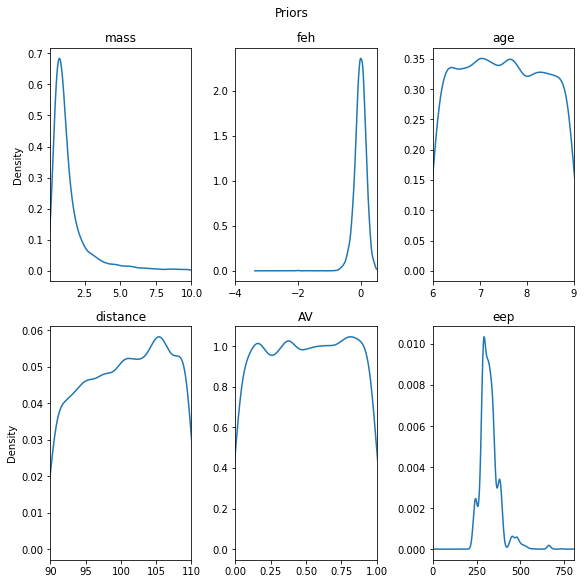

In [24]:
fig = s.plot_isochrones_priors()

In [25]:
#run isochrone single star model
iso_model = s.run_isochrones(iso_params=iso_params, 
                       overwrite=False,
                       n_live_points=1000 #multinest parameter
                      )

Using previously initialized model.
Method: Nested Sampling
Initial values:
logpost=loglike+logprior = -1505890.95 + -inf = -inf
Final values:
logpost=loglike+logprior = -87.77 + -7.49 = -95.27
  analysing data from ./chains/V1298 Tau-mist-single-.txt
Model evidence: (-74.60140715901842, 0.009283198044012342)


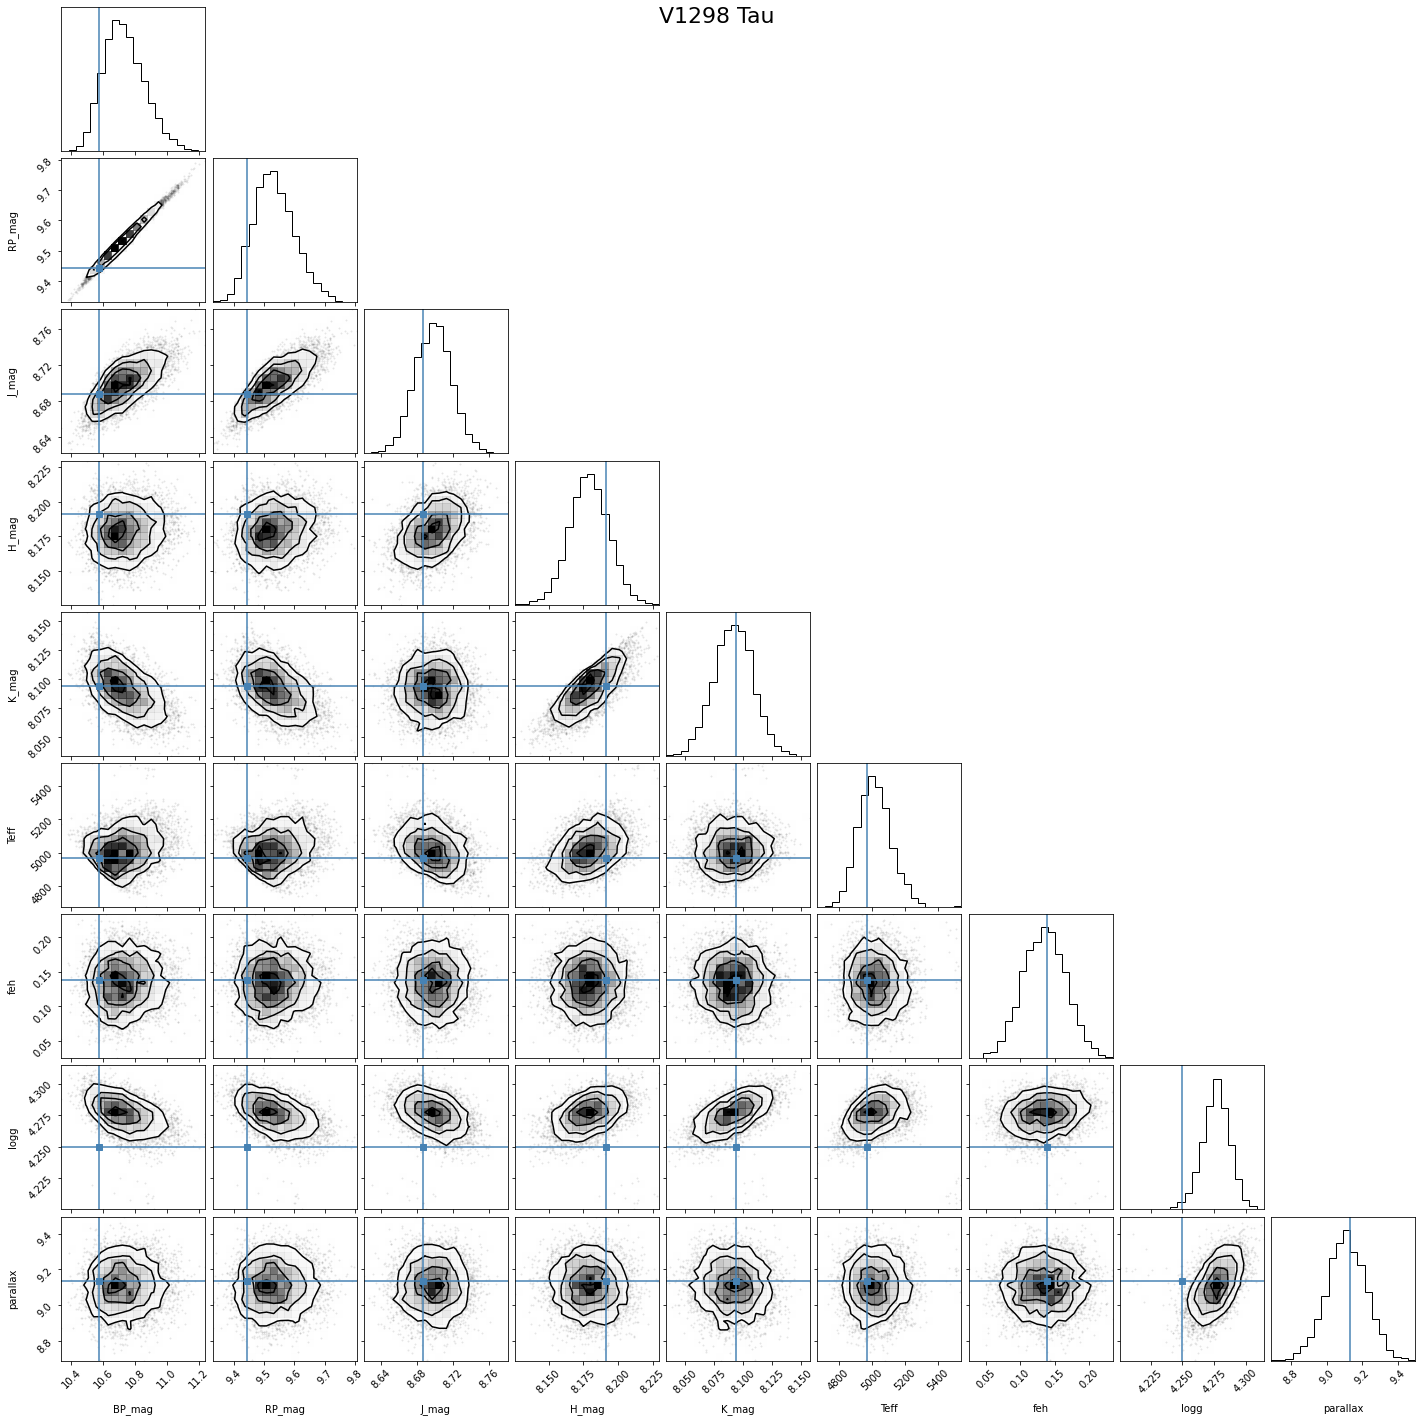

In [26]:
fig = s.plot_corner(posterior="observed")

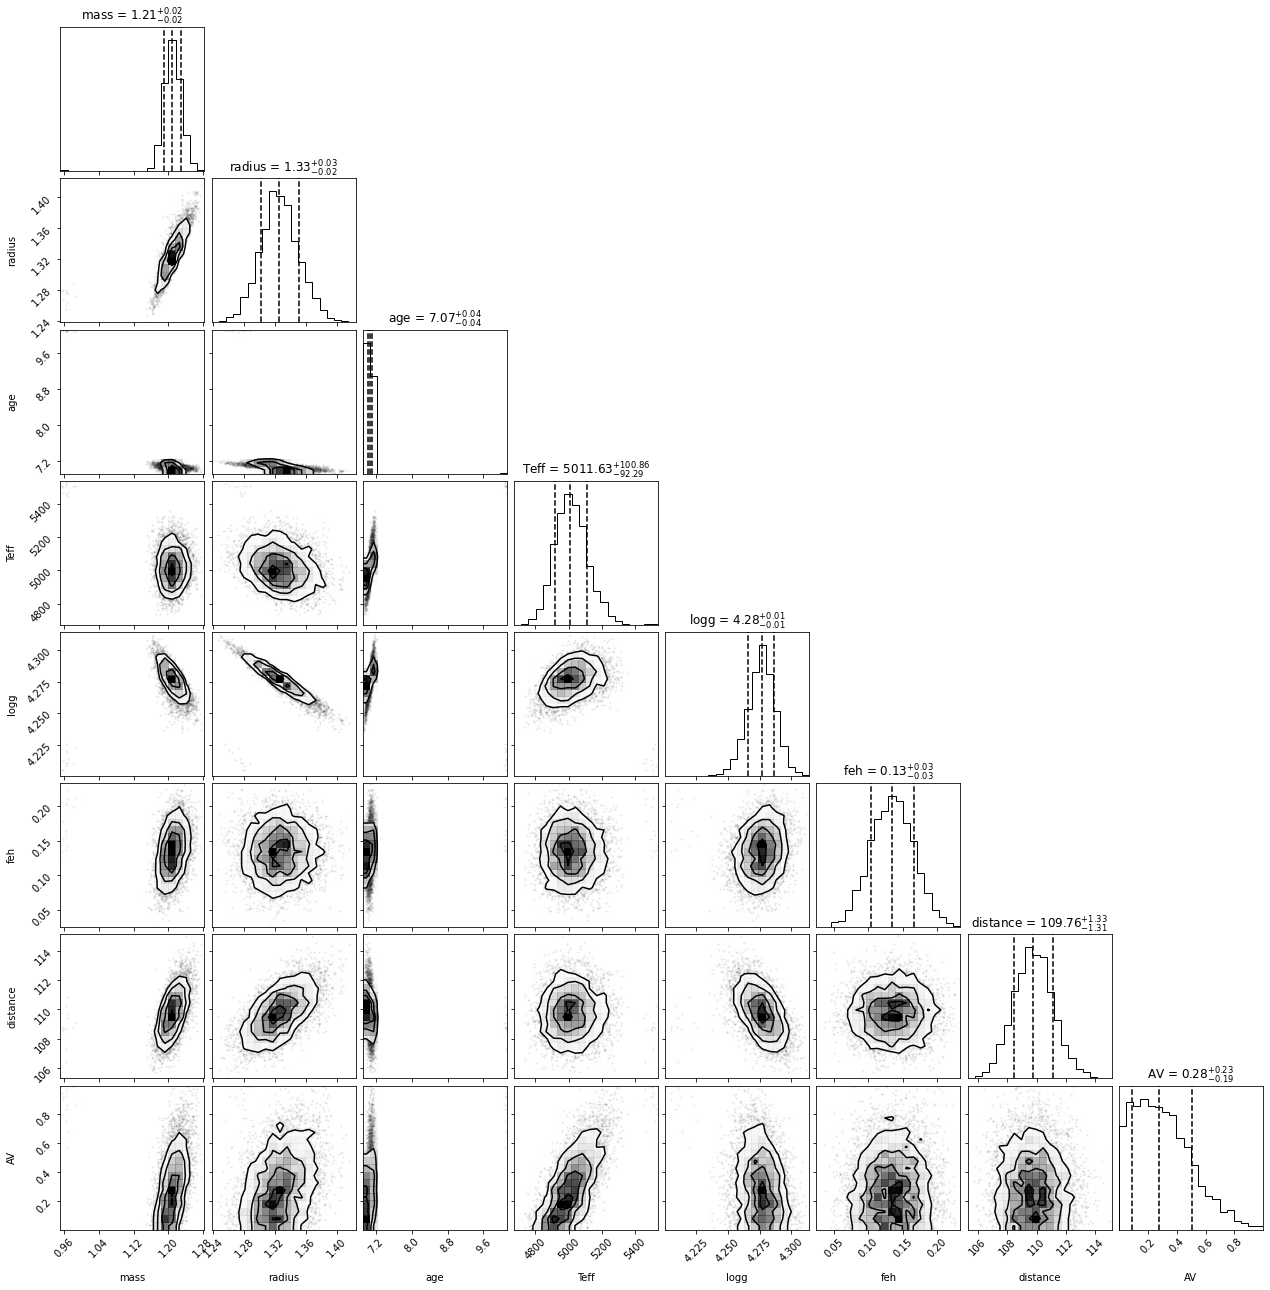

In [27]:
fig = s.plot_corner(posterior='physical')

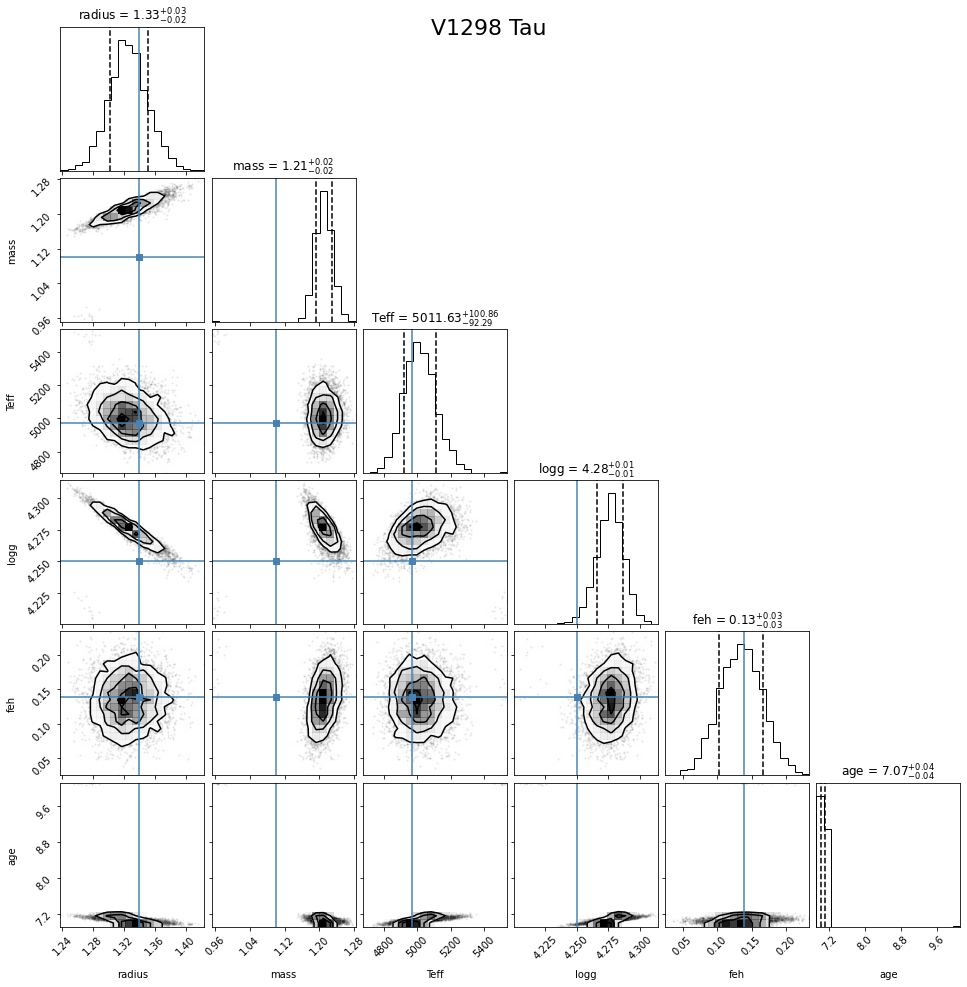

In [28]:
cols = 'radius mass Teff logg feh age'.split()

truths = (
    d['st_rad'].values[0],
    d['st_mass'].values[0],
    props['Teff'][0],
    props['logg'][0],
    props['feh'][0],
    d['st_age'].values[0],
    )

fig = s.isochrones_model.corner_derived(cols, 
                                         quantiles=(0.16,0.84), 
                                         show_titles=True,
                                         truths=truths
                                        );

(0.0, 1000.0)

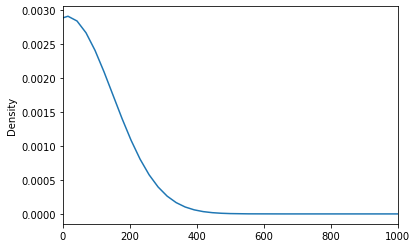

In [38]:
ax = s.isochrones_model.derived_samples.age.apply(lambda x: (10**x)/1e6).plot(kind='kde')
ax.set_xlim(0, 1e3)

In [40]:
fp = '../isochrones_runs/'+name.replace(' ', '_')
s.save_ini_isochrones(fp)

Saved: ../isochrones_runs/V1298_Tau/star.ini
['Teff = 4970, 120', 'feh = 0.139, 0.031', 'logg = 4.250, 0.030', 'parallax = 9.134, 0.116', 'J = 8.687, 0.023', 'H = 8.191, 0.023', 'K = 8.094, 0.021']
